<a href="https://colab.research.google.com/github/Hannah-hope/USA-Housing/blob/main/USA_housing_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Import Data

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving USA_Housing.csv to USA_Housing.csv


In [ ]:
import io
df1 = pd.read_csv(io.BytesIO(uploaded['USA_Housing.csv']))

In [ ]:
df1.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [ ]:
df1.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

Split Data

In [ ]:
x = df1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = df1['Price']


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3500 entries, 1366 to 3398
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              3500 non-null   float64
 1   Avg. Area House Age           3500 non-null   float64
 2   Avg. Area Number of Rooms     3500 non-null   float64
 3   Avg. Area Number of Bedrooms  3500 non-null   float64
 4   Area Population               3500 non-null   float64
dtypes: float64(5)
memory usage: 164.1 KB


In [ ]:
y_train

1366    7.665943e+05
3452    1.302664e+06
2252    1.193254e+06
2758    1.111711e+06
2436    1.460341e+06
            ...     
3603    1.259191e+06
4722    1.236308e+06
3340    1.304284e+06
3064    2.180066e+06
3398    8.914682e+05
Name: Price, Length: 3500, dtype: float64

Training the model

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

y=mx+c
y-
m- intercept
x- variables
c-error


In [ ]:
lr_model.coef_

array([2.14620560e+01, 1.65486470e+05, 1.21327448e+05, 1.51154874e+03,
       1.50898007e+01])

In [ ]:
lr_model.intercept_

-2629944.843687405

In [ ]:
coeffients = pd.DataFrame(lr_model.coef_,x.columns,columns=['Coeffiecinets'])
coeffients

#y=mx+nx+bx+ax+c




,Coeffiecinets
Avg. Area Income,21.462056
Avg. Area House Age,165486.469509
Avg. Area Number of Rooms,121327.447536
Avg. Area Number of Bedrooms,1511.548745
Area Population,15.089801


Predictions

In [ ]:
predictions=lr_model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



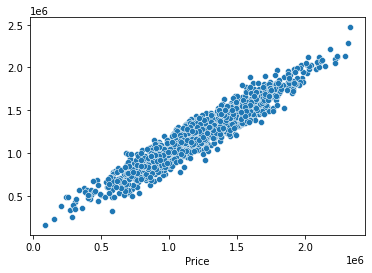

In [ ]:
sns.scatterplot(y_test, predictions)


Model_evaluation

In [ ]:
from sklearn import metrics


In [ ]:
metrics.mean_absolute_error(y_test, predictions)

82850.98683806893

In [ ]:
print('MAE', metrics.mean_absolute_error(y_test, predictions))
print('MSE', metrics.mean_squared_error(y_test, predictions))
print('RMSE', np.sqrt(metrics.mean_absolute_error(y_test, predictions)))


MAE 82850.98683806893
MSE 10758090089.107685
RMSE 287.8384735195574
